<a href="https://colab.research.google.com/github/ngcthanh2903/AI-homework/blob/main/money/money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
import cv2 as cv #thư viện opencv để xử lý ảnh thô chuyển thành dữ liệu
import numpy as np # thư viện numpy
import os #lấy đường dẫn tới thư mục chứa hình ảnh
import matplotlib.pyplot as plt


In [3]:
import tensorflow as tf 
kernel = np.array([[-1,-1,-1], 
                       [-1, 9.05,-1],
                       [-1,-1,-1]])
X = []#tạo list chứa dữ liệu ảnh
y = []#tạo list chứa label của từng ảnh
labels = os.listdir('/content/drive/MyDrive/money')#gọi biến labels là list gồm các thư mục data con chứa ảnh 


#tạo đường dẫn vào vào dataset
path='/content/drive/MyDrive'
dataset = 'money'

#cho biến label trong vòng lặp list labels 
for label in labels:
        
        # Và lặp các ảnh trong thư mục
        for file in os.listdir(os.path.join(path, dataset, label)):
            # đọc ảnh            
            image = cv.imread(os.path.join(path, dataset, label, file),cv.IMREAD_UNCHANGED)
            #chuyển ảnh cấu trúc màu BGR thành RGB
            image =cv.cvtColor(image,cv.COLOR_BGR2RGB)
            image =cv.GaussianBlur(image,(5,5),0,0)
            # chuyển tên các label thành dạng số 
            classnum = labels.index(label)
            #đưa shape ảnh về kích thước 150x150
            img = cv.resize(image,(300,100))

            #sữ lý độ sáng và độ tương phản
            img= cv.filter2D(img, -1, kernel)
            img = cv.normalize(img, None, alpha=0,beta=210, norm_type=cv.NORM_MINMAX)
            img = tf.image.adjust_brightness(img,0.2)
            img = tf.image.adjust_contrast(img,1)
            
            #đưa dữ liệu ảnh đc xử lý vào list X          
            X.append(img)
            #đưa dữ liệu label vào list y
            y.append(classnum)

In [4]:
#đưa list X về dữ liệu dạng mảng tensor
X= np.array(X)
#đưa list y vễ dạng mảng
y= np.array(y)

In [5]:
X.shape

(110, 100, 300, 3)

In [6]:
y.shape

(110,)

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

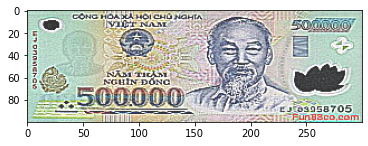

In [10]:
plt.imshow(X[50])

In [11]:
import tensorflow as tf 
x_leftright = []
y_leftright  = []
for i in range(X.shape[0]):
  xi = tf.image.flip_left_right(X[i])
  yi = y[i]
  x_leftright.append(xi)
  y_leftright.append(yi)

In [12]:
x_leftright = np.array(x_leftright)
y_leftright = np.array(y_leftright)


In [13]:
y_leftright

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

9


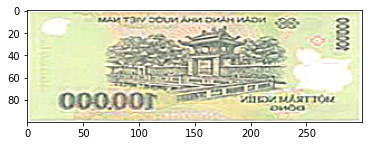

In [14]:
plt.imshow(x_leftright[-1])
print(y_leftright[-1])

In [15]:
import tensorflow as tf 
x_updown = []
y_updown  = []
for i in range(X.shape[0]):
  xi = tf.image.flip_up_down(x_leftright[i])
  yi = y[i]
  x_updown.append(xi)
  y_updown.append(yi)

In [16]:
x_updown = np.array(x_updown)
y_updown = np.array(y_updown)

0


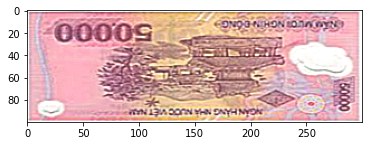

In [17]:
plt.imshow(x_updown[1])
print(y_updown[1])

In [18]:
X_train = np.concatenate((X,x_leftright,x_updown))
Y_train = np.concatenate((y,y_leftright,y_updown))

In [19]:
Y_train.shape

(330,)

In [20]:
X_train.shape

(330, 100, 300, 3)

In [21]:
keys = np.array(range(X_train.shape[0]))
np.random.shuffle(keys)
x_train = X_train[keys]
y_train = Y_train[keys]

In [22]:
y_train

array([3, 9, 6, 0, 0, 3, 1, 4, 9, 4, 8, 8, 9, 7, 5, 3, 3, 1, 8, 3, 4, 2,
       5, 6, 2, 3, 2, 3, 8, 1, 7, 6, 5, 1, 2, 0, 8, 9, 6, 7, 1, 2, 1, 9,
       2, 0, 5, 0, 0, 1, 5, 2, 1, 1, 9, 0, 6, 5, 6, 6, 4, 5, 8, 4, 7, 0,
       6, 3, 0, 2, 0, 9, 9, 9, 3, 9, 3, 8, 0, 9, 9, 9, 8, 5, 4, 6, 5, 5,
       0, 2, 8, 0, 3, 8, 9, 7, 0, 7, 9, 0, 8, 1, 2, 1, 1, 7, 8, 1, 5, 2,
       7, 7, 2, 7, 8, 4, 5, 4, 2, 3, 3, 7, 2, 7, 5, 4, 2, 5, 3, 5, 8, 9,
       9, 8, 1, 8, 2, 2, 2, 1, 0, 0, 6, 1, 5, 3, 6, 4, 7, 8, 6, 0, 7, 2,
       6, 5, 9, 3, 6, 0, 0, 3, 5, 3, 9, 7, 1, 8, 5, 1, 8, 3, 2, 7, 8, 2,
       3, 6, 8, 6, 9, 1, 1, 4, 5, 7, 5, 7, 9, 9, 0, 2, 6, 5, 0, 9, 3, 8,
       4, 2, 5, 4, 9, 6, 3, 1, 8, 1, 2, 9, 4, 3, 7, 4, 7, 5, 7, 8, 3, 4,
       3, 8, 1, 4, 6, 3, 3, 4, 0, 2, 5, 2, 6, 2, 1, 1, 9, 3, 0, 7, 2, 7,
       2, 0, 6, 0, 4, 0, 0, 5, 3, 4, 6, 0, 6, 2, 0, 1, 6, 4, 6, 6, 4, 3,
       7, 4, 4, 1, 9, 7, 5, 2, 4, 1, 4, 4, 6, 1, 7, 5, 8, 9, 0, 5, 1, 0,
       1, 9, 4, 8, 6, 9, 7, 5, 2, 6, 0, 7, 8, 0, 9,

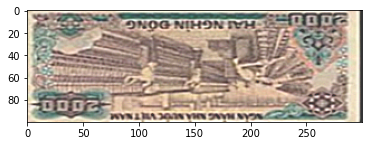

In [23]:
plt.imshow(x_train[22])

In [24]:
from tensorflow.keras.utils import to_categorical
#onehot label y 
y_train= to_categorical(y_train,10)

In [25]:
y_train.shape

(330, 10)

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
model = Sequential()

model.add(Conv2D(filters=32,  kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100,300,3), strides=(2,2)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=64,  kernel_size=(3,3),  activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=128,kernel_size=(3,3),  activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(1028, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 150, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 18, 128)       0

In [28]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(100,300,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2),strides = 2))


model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(2,2),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512,(2,2),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 300, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 300, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 150, 32)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 50, 150, 64)       18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 25, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 25, 75, 128)      

In [29]:
#gọi hàm loss
from keras.backend import categorical_crossentropy
#gọi opimizer
from tensorflow.keras.optimizers import Adam,SGD

#opt= SGD(lr=0.01,momentum=0.9)
#sử dụng optimizer Adam
opt =Adam()
#cấu hình train
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
#bỏ dữ liệu vô train
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=(0.1), verbose=1)
#lưu model
model.save('final.h5')

Epoch 1/20
5/5 [==============================] - 37s 7s/step - loss: 7495.6533 - accuracy: 0.0976 - val_loss: 2894.2117 - val_accuracy: 0.0909
Epoch 2/20
5/5 [==============================] - 37s 7s/step - loss: 1768.1780 - accuracy: 0.0976 - val_loss: 400.8137 - val_accuracy: 0.0909
Epoch 3/20
5/5 [==============================] - 36s 7s/step - loss: 187.5432 - accuracy: 0.1246 - val_loss: 25.2216 - val_accuracy: 0.2121
Epoch 4/20
5/5 [==============================] - 35s 7s/step - loss: 19.7065 - accuracy: 0.1785 - val_loss: 13.2739 - val_accuracy: 0.1818
Epoch 5/20
5/5 [==============================] - 35s 7s/step - loss: 8.2605 - accuracy: 0.2795 - val_loss: 3.3239 - val_accuracy: 0.3636
Epoch 6/20
5/5 [==============================] - 36s 7s/step - loss: 2.2348 - accuracy: 0.4343 - val_loss: 1.3578 - val_accuracy: 0.5455
Epoch 7/20
5/5 [==============================] - 35s 7s/step - loss: 1.0993 - accuracy: 0.6700 - val_loss: 0.6822 - val_accuracy: 0.7879
Epoch 8/20
5/5 [==

In [30]:
model.save('money.h5')

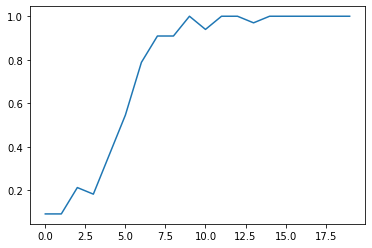

In [31]:
plt.plot(history.history['val_accuracy'])

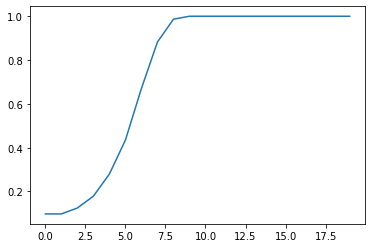

In [32]:
plt.plot(history.history['accuracy'])

In [33]:
labels= {0:'50k',
         1:'10k',
         2:'1k',
         3:'200k',
         4:'500k',
         5:'2k',
         6:'500đ',
         7:'20k',
         8:'5k',
         9:'100k'}

[[4.6406484e-07 2.3063230e-04 3.6591822e-01 4.8635229e-06 2.6393326e-03
  6.2975562e-01 1.3389830e-05 1.5647469e-06 2.8384304e-05 1.4075473e-03]]
độ chính xác: 62 %
expectation 2k


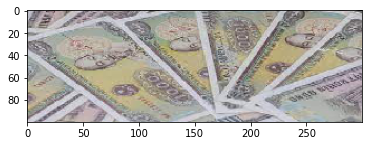

In [62]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 300))	
	
	return img
model = load_model('money.h5')
	# load model
img = load_image('1k.jpg')

plt.imshow(img)
img = img_to_array(img)

img = img.reshape(1,100,300,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[3.2795228e-07 1.3531001e-03 6.8398213e-01 1.0053564e-03 2.2383681e-03
  3.0979922e-01 1.6080081e-03 8.6856815e-09 9.3939834e-06 4.0811965e-06]]
độ chính xác: 68 %
expectation 1k


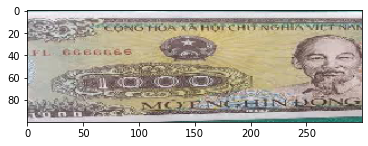

In [43]:
img = load_image('1k(5).jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,100,300,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[5.80331182e-12 1.31290335e-06 7.54736364e-01 3.40622552e-09
  1.26578331e-01 1.09658964e-01 5.31532223e-08 1.43236143e-03
  1.15011120e-04 7.47751398e-03]]
độ chính xác: 75 %
expectation 1k


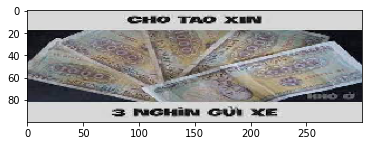

In [46]:
img = load_image('1k(4).jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,300,3)  
#img = tf.image.adjust_brightness(img,0.2)
#img = tf.image.adjust_contrast(img,1)
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[1.6187816e-08 4.1718376e-06 2.3172036e-04 1.1503708e-05 5.9729132e-06
  9.9974412e-01 6.9602277e-07 2.0354388e-07 3.5497868e-07 1.3429311e-06]]
độ chính xác: 99 %
expectation 2k


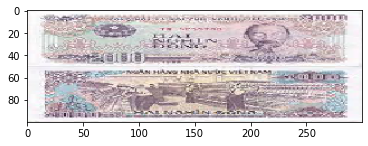

In [52]:
img = load_image('2k.jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,300,3)  
#img = tf.image.adjust_brightness(img,0.2)
#img = tf.image.adjust_contrast(img,1)
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[3.1416559e-24 1.3385117e-17 2.0501993e-07 2.8814568e-12 1.4466250e-06
  1.7076019e-07 8.6360681e-14 2.4391281e-10 9.9959022e-01 4.0801967e-04]]
độ chính xác: 99 %
expectation 5k


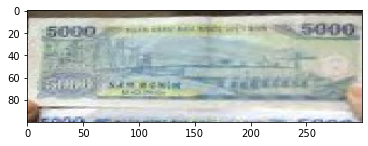

In [57]:
kernel = np.array([[-1,-1,-1], 
                       [-1, 9.05,-1],
                       [-1,-1,-1]])
img = load_image('5k.jpg')
plt.imshow(img)
img = img_to_array(img)
img= cv.filter2D(img, -1, kernel)

img = img.reshape(1,100,300,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[9.1930296e-16 5.3805778e-19 1.0976596e-09 2.8478100e-11 9.9999368e-01
  4.4009463e-13 6.7970481e-18 5.7542416e-06 1.0356246e-08 6.4115409e-07]]
độ chính xác: 99 %
expectation 500k


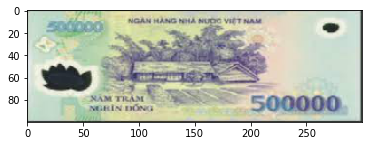

In [64]:
img = load_image('500k.jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,300,3)  
#img = tf.image.adjust_brightness(img,0.2)
#img = tf.image.adjust_contrast(img,1)
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[1.00793886e-23 1.39967206e-24 2.24399082e-19 2.56054028e-14
  2.13902840e-10 1.48944351e-16 1.33331348e-28 9.99999881e-01
  9.58152446e-10 8.36730720e-08]]
độ chính xác: 99 %
expectation 20k


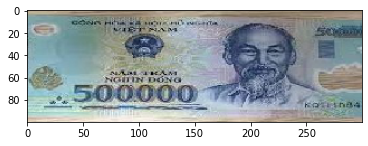

In [112]:
img = load_image('500k(1).jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,300,3)  

img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[1.0918848e-05 1.3109217e-05 1.7482773e-04 5.2310852e-03 4.9642515e-03
  2.6025671e-01 1.9605973e-06 7.9703461e-03 3.2746066e-05 7.2134405e-01]]
độ chính xác: 72 %
expectation 100k


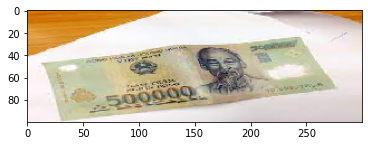

In [113]:
img = load_image('500k(2).jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,300,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[3.4116211e-04 2.2465026e-06 2.2176769e-02 7.4156351e-02 5.9203082e-01
  4.7937704e-07 3.1128615e-01 7.0057668e-11 3.7233491e-10 5.9848148e-06]]
độ chính xác: 59 %
expectation 500k


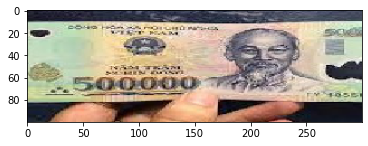

In [114]:
img = load_image('500k(3).jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,300,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[5.8432881e-09 2.0039159e-09 1.4442808e-09 3.6852543e-06 3.4872689e-06
  1.3323599e-05 2.7090157e-11 9.6605629e-01 5.1673152e-04 3.3406444e-02]]
độ chính xác: 96 %
expectation 20k


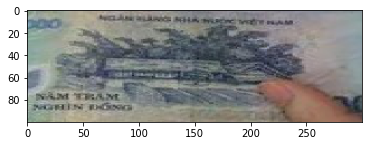

In [115]:
img = load_image('500k(4).jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,300,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[4.6040959e-04 5.6396547e-04 4.9170640e-06 1.5311633e-02 3.3134285e-02
  1.4190954e-03 9.9797954e-04 1.6260596e-01 9.0120389e-05 7.8541166e-01]]
độ chính xác: 78 %
expectation 100k


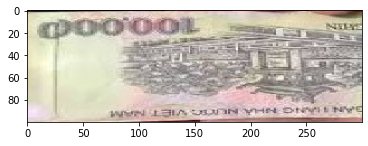

In [116]:
img = load_image('100k.jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,300,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[1.1205004e-06 2.0143403e-08 7.9362812e-03 5.4307640e-02 9.0906954e-01
  5.2381982e-03 1.5807332e-06 6.1841216e-05 5.2679552e-06 2.3378562e-02]]
độ chính xác: 90 %
expectation 500k


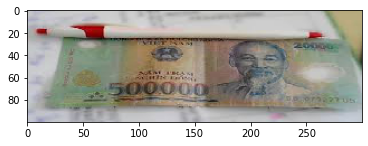

In [117]:
img = load_image('500k(5).jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,300,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[7.53064733e-18 5.97111079e-18 9.59753721e-10 2.02205657e-12
  8.76866579e-01 5.57003140e-14 4.18652336e-14 1.21813506e-01
  1.31926127e-03 6.19521416e-07]]
độ chính xác: 87 %
expectation 500k


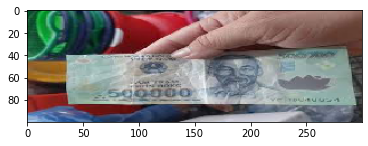

In [118]:
img = load_image('500k(6).jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,300,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[2.6267355e-06 1.1602845e-06 3.2659780e-04 9.5348153e-03 7.9399836e-01
  3.7738942e-02 1.3690221e-05 6.2150441e-02 3.2285854e-04 9.5910445e-02]]
độ chính xác: 79 %
expectation 500k


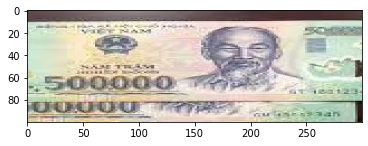

In [119]:
img = load_image('500k(7).jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,300,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[2.6267355e-06 1.1602845e-06 3.2659780e-04 9.5348153e-03 7.9399836e-01
  3.7738942e-02 1.3690221e-05 6.2150441e-02 3.2285854e-04 9.5910445e-02]]
độ chính xác: 79 %
expectation 500k


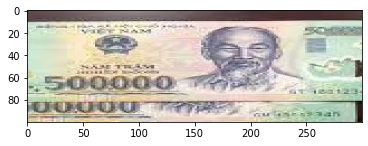

In [120]:
img = load_image('500k(7).jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,300,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[1.2654639e-16 1.0400884e-13 2.2651787e-15 1.9450916e-09 7.4147601e-07
  3.3390721e-10 5.8164011e-14 7.3564279e-01 2.6421863e-01 1.3788395e-04]]
độ chính xác: 73 %
expectation 20k


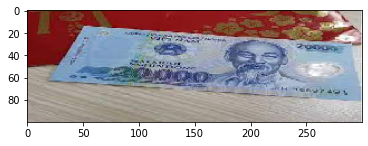

In [103]:
img = load_image('20k.jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,300,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

In [104]:
y_pred = model.predict(x_train)

In [105]:
np.argmax(y_pred,axis=1)

array([3, 9, 6, 0, 0, 3, 1, 4, 9, 4, 8, 8, 9, 7, 5, 3, 3, 1, 8, 3, 4, 2,
       5, 6, 2, 3, 2, 3, 8, 1, 7, 6, 5, 1, 2, 0, 8, 9, 6, 7, 1, 2, 1, 9,
       2, 0, 5, 0, 0, 1, 5, 2, 1, 1, 9, 0, 6, 5, 6, 6, 4, 5, 8, 4, 7, 0,
       6, 3, 0, 2, 0, 9, 9, 9, 3, 9, 3, 8, 0, 9, 9, 9, 8, 5, 4, 6, 5, 5,
       0, 2, 8, 0, 3, 8, 9, 7, 0, 7, 9, 0, 8, 1, 2, 1, 1, 7, 8, 1, 5, 2,
       7, 7, 2, 7, 8, 4, 5, 4, 2, 3, 3, 7, 2, 7, 5, 4, 2, 5, 3, 5, 8, 9,
       9, 8, 1, 8, 2, 2, 2, 1, 0, 0, 6, 1, 5, 3, 6, 4, 7, 8, 6, 0, 7, 2,
       6, 5, 9, 3, 6, 0, 0, 3, 5, 3, 9, 7, 1, 8, 5, 1, 8, 3, 2, 7, 8, 2,
       3, 6, 8, 6, 9, 1, 1, 4, 5, 7, 5, 7, 9, 9, 0, 2, 6, 5, 0, 9, 3, 8,
       4, 2, 5, 4, 9, 6, 3, 1, 8, 1, 2, 9, 4, 3, 7, 4, 7, 5, 7, 8, 3, 4,
       3, 8, 1, 4, 6, 3, 3, 4, 0, 2, 5, 2, 6, 2, 1, 1, 9, 3, 0, 7, 2, 7,
       2, 0, 6, 0, 4, 0, 0, 5, 3, 4, 6, 0, 6, 2, 0, 1, 6, 4, 6, 6, 4, 3,
       7, 4, 4, 1, 9, 7, 5, 2, 4, 1, 4, 4, 6, 1, 7, 5, 8, 9, 0, 5, 1, 0,
       1, 9, 4, 8, 6, 9, 7, 5, 2, 6, 0, 7, 8, 0, 9,

In [106]:
np.argmax(y_train,axis=1)

array([3, 9, 6, 0, 0, 3, 1, 4, 9, 4, 8, 8, 9, 7, 5, 3, 3, 1, 8, 3, 4, 2,
       5, 6, 2, 3, 2, 3, 8, 1, 7, 6, 5, 1, 2, 0, 8, 9, 6, 7, 1, 2, 1, 9,
       2, 0, 5, 0, 0, 1, 5, 2, 1, 1, 9, 0, 6, 5, 6, 6, 4, 5, 8, 4, 7, 0,
       6, 3, 0, 2, 0, 9, 9, 9, 3, 9, 3, 8, 0, 9, 9, 9, 8, 5, 4, 6, 5, 5,
       0, 2, 8, 0, 3, 8, 9, 7, 0, 7, 9, 0, 8, 1, 2, 1, 1, 7, 8, 1, 5, 2,
       7, 7, 2, 7, 8, 4, 5, 4, 2, 3, 3, 7, 2, 7, 5, 4, 2, 5, 3, 5, 8, 9,
       9, 8, 1, 8, 2, 2, 2, 1, 0, 0, 6, 1, 5, 3, 6, 4, 7, 8, 6, 0, 7, 2,
       6, 5, 9, 3, 6, 0, 0, 3, 5, 3, 9, 7, 1, 8, 5, 1, 8, 3, 2, 7, 8, 2,
       3, 6, 8, 6, 9, 1, 1, 4, 5, 7, 5, 7, 9, 9, 0, 2, 6, 5, 0, 9, 3, 8,
       4, 2, 5, 4, 9, 6, 3, 1, 8, 1, 2, 9, 4, 3, 7, 4, 7, 5, 7, 8, 3, 4,
       3, 8, 1, 4, 6, 3, 3, 4, 0, 2, 5, 2, 6, 2, 1, 1, 9, 3, 0, 7, 2, 7,
       2, 0, 6, 0, 4, 0, 0, 5, 3, 4, 6, 0, 6, 2, 0, 1, 6, 4, 6, 6, 4, 3,
       7, 4, 4, 1, 9, 7, 5, 2, 4, 1, 4, 4, 6, 1, 7, 5, 8, 9, 0, 5, 1, 0,
       1, 9, 4, 8, 6, 9, 7, 5, 2, 6, 0, 7, 8, 0, 9,

In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
matrix = confusion_matrix(np.argmax(y_train,axis=1),np.argmax(y_pred,axis=1), labels=None)

In [109]:
['50k','10k','1k','200k','500k','2k','500đ','20k','5k','100k']

['50k', '10k', '1k', '200k', '500k', '2k', '500đ', '20k', '5k', '100k']

[Text(0, 0.5, '50k'),
 Text(0, 1.5, '10k'),
 Text(0, 2.5, '1k'),
 Text(0, 3.5, '200k'),
 Text(0, 4.5, '500k'),
 Text(0, 5.5, '2k'),
 Text(0, 6.5, '500đ'),
 Text(0, 7.5, '20k'),
 Text(0, 8.5, '5k'),
 Text(0, 9.5, '100k')]

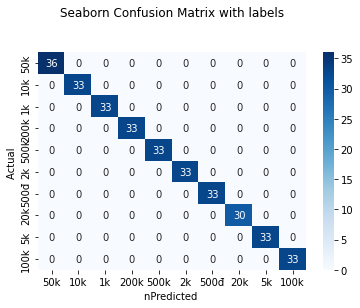

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('nPredicted ')
ax.set_ylabel('Actual ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['50k','10k','1k','200k','500k','2k','500đ','20k','5k','100k'])
ax.yaxis.set_ticklabels(['50k','10k','1k','200k','500k','2k','500đ','20k','5k','100k'])

## Display the